In [1]:
#Map vs Flat Map
#Map retains original structure, but flatMap blows out Rdds.

import findspark
findspark.init('/home/ubuntu/spark-2.2.0-bin-hadoop2.7')

from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster('local').setAppName('Map')
sc = SparkContext(conf = conf)

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('countBook').getOrCreate()


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''
lines = ['The quick Brown Fox', 'Jumped Over', 'Those Lazy Dogs']
lines.map(lambnda x: x.upper() -> ['THE QUICK BROWN FOX',
                                   'JUMPED OVER',
                                   'THOSE LAZY DOGS']
                                   
lines.flatmap(lambnda x: x.splt().upper() -> ['THE', 'QUICK', 'BROWN',
                                       'FOX','JUMPED', 'OVER',
                                       'THOSE', 'LAZY', 'DOGS']
'''

"\nlines = ['The quick Brown Fox', 'Jumped Over', 'Those Lazy Dogs']\nlines.map(lambnda x: x.upper() -> ['THE QUICK BROWN FOX',\n                                   'JUMPED OVER',\n                                   'THOSE LAZY DOGS']\n                                   \nlines.flatmap(lambnda x: x.splt().upper() -> ['THE', 'QUICK', 'BROWN',\n                                       'FOX','JUMPED', 'OVER',\n                                       'THOSE', 'LAZY', 'DOGS']\n"

# Import Text and Count

In [47]:
import re
def normalizeWords(text):
    #Break up this text by words (W)
    return re.compile(r'\W+', re.UNICODE).split(text.lower())

In [63]:
folder = '/home/ubuntu/data/raw'
file = '/tamingBD-Book.txt'

#Import rdd as df
rdd = spark.read.csv(folder+file, header=True, inferSchema=True)
rdd.printSchema()
rdd.collect()[1:10]

#import rdd 
rdd = sc.textFile(folder+file)

#split into words
words = rdd.flatMap(lambda x: normalizeWords(x))
#Or you could type = rdd.flatMap(normalizeWords)

print('There are ',len(words.collect()), 'words')
print(words.collect()[1:25])

#Dont use coutByValue....
#wordCounts = words.countByValue()
wordCounts = words.map(lambda x: (x,1)).reduceByKey(lambda x, y: x + y)
wordCountsSorted = wordCounts.map(lambda x, y: (y,x)).sortByKey()
#results = wordCountsSorted.select()

root
 |-- Self-Employment: Building an Internet Business of One: string (nullable = true)

There are  48448 words
['employment', 'building', 'an', 'internet', 'business', 'of', 'one', 'achieving', 'financial', 'and', 'personal', 'freedom', 'through', 'a', 'lifestyle', 'technology', 'business', 'by', 'frank', 'kane', '', '', '', 'copyright']


# Count Text using countByValue

In [44]:
wordCounts = words.countByValue()
#Clean Words
cleanWords = []

#convert from unicode to ascii
for word, count in wordCounts.items():
    cleanWord = word.encode('ascii', 'ignore')
    if cleanWord:
        cleanWords.append([cleanWord, count])
        #print(cleanWord, count)
        
(cleanWords[1:10])
cleanWords.sort(key = lambda row: row[1])
cleanWords[4000:-2]

[[b'working', 58],
 [b'important', 58],
 [b'think', 58],
 [b'use', 58],
 [b'then', 59],
 [b'enough', 59],
 [b'once', 59],
 [b'software', 60],
 [b'idea', 60],
 [b'over', 62],
 [b'any', 62],
 [b'someone', 62],
 [b'google', 63],
 [b'plan', 64],
 [b'still', 65],
 [b'sure', 65],
 [b'market', 66],
 [b'well', 66],
 [b'products', 67],
 [b'those', 68],
 [b'should', 69],
 [b'ad', 70],
 [b'might', 70],
 [b'most', 70],
 [b'before', 70],
 [b'many', 71],
 [b'good', 72],
 [b'day', 73],
 [b'employment', 75],
 [b'ads', 75],
 [b'no', 76],
 [b'probably', 76],
 [b'other', 78],
 [b'like', 78],
 [b'yourself', 78],
 [b'into', 79],
 [b'only', 79],
 [b'sales', 80],
 [b'find', 81],
 [b'these', 82],
 [b'was', 85],
 [b'money', 86],
 [b'who', 88],
 [b'job', 90],
 [b'much', 90],
 [b'also', 91],
 [b'than', 92],
 [b've', 95],
 [b'one', 100],
 [b'when', 102],
 [b'even', 104],
 [b'may', 107],
 [b'make', 108],
 [b'website', 109],
 [b'self', 111],
 [b'll', 114],
 [b'some', 121],
 [b'company', 122],
 [b'their', 122],
 [b'

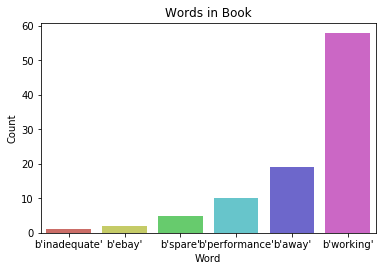

In [45]:
cleanWords = [cleanWords[1000], cleanWords[2000], cleanWords[3000],cleanWords[3500],cleanWords[3750],cleanWords[4000]]
coolest_df = pd.DataFrame(cleanWords,columns=['word','count'])

sns.barplot(x=coolest_df['word'], y=coolest_df['count'], palette='hls')
plt.title('Words in Book')
plt.xlabel('Word')
plt.ylabel('Count')
plt.subplots_adjust(bottom=0.15)
plt.show()
plt.clf()